In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading Snapshots

In [113]:
netaDf = pd.read_csv('Neta.csv')
racDf = pd.read_csv('Rac.csv')
tradDf = pd.read_csv('Tradooor.csv')
rektDf = pd.read_csv('Rektbulls.csv')
foreDf = pd.read_csv('Forecast.csv')
junoDf = pd.read_csv('Junostakers.csv')
lvnDf = pd.read_csv('LevanaDragons.csv')

In [114]:
PRECISION = 1000000
TOTAL_SUPPLY = 1000000*PRECISION

JUNO_PERC = 0.5
NETA_PERC = 0.04
RAC_PERC = 0.04
TRAD_PERC = 0.01
REKT_PERC = 0.02
FORE_PERC = 0.03
LVN_PERC = 0.01

JUNO_SHARE = JUNO_PERC * TOTAL_SUPPLY
NETA_SHARE = NETA_PERC * TOTAL_SUPPLY
RAC_SHARE =  RAC_PERC * TOTAL_SUPPLY
TRAD_SHARE = TRAD_PERC * TOTAL_SUPPLY
REKT_SHARE = REKT_PERC * TOTAL_SUPPLY
FORE_SHARE = FORE_PERC * TOTAL_SUPPLY
LVN_SHARE = LVN_PERC * TOTAL_SUPPLY
# 65% Dropped

DELIVERDAO_ADDR = "juno1qw7da3njp4kuke55g4feaccshvk5s6uz5mjjn2ldkl08ruk9l7dsvrveuw"
# 10% CZAR DAO Treasury
# 20% Allocated to DeliverDAO Treasury
# 5% Allocated immediately, then 20% linearly unlocks over 4 months

assert(JUNO_PERC + NETA_PERC + RAC_PERC + TRAD_PERC + REKT_PERC + FORE_PERC + LVN_PERC + 0.35 == 1)

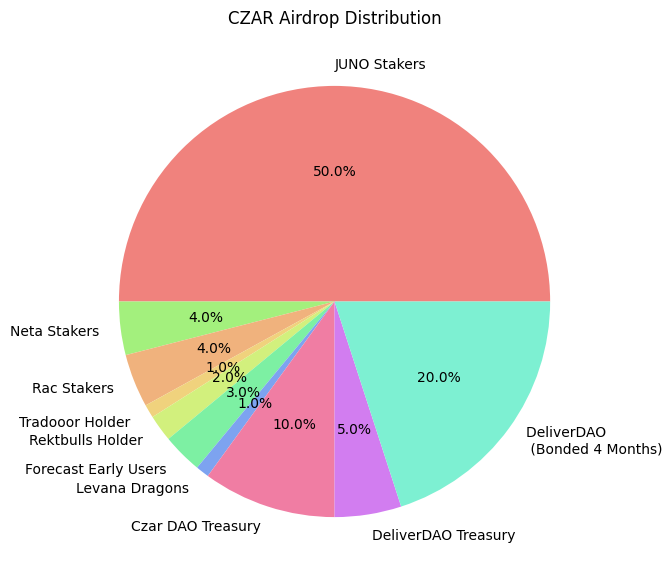

In [115]:
airDropees = [
'JUNO Stakers', 
'Neta Stakers', 
'Rac Stakers',
'Tradooor Holder',
'Rektbulls Holder', 
'Forecast Early Users', 
'Levana Dragons',
'Czar DAO Treasury', 
'DeliverDAO Treasury', 
'DeliverDAO \n (Bonded 4 Months)',]

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)
    
colors = ["#f0827d","#a3f07d", "#f0b27d", "#f0d27d", "#d2f07d",  "#7df0a3", "#7da3f0", "#f07da3","#d27df0", "#7df0d2"]
data = [JUNO_PERC, NETA_PERC, RAC_PERC, TRAD_PERC, REKT_PERC, FORE_PERC, LVN_PERC, 0.1, 0.05, 0.2]
# data = [JUNO_PERC,, 10, 5, 20]
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = airDropees, colors=colors,  autopct = lambda pct: func(pct, data))
plt.title("CZAR Airdrop Distribution")
# show plot
plt.show()

## JUNO Stakers

In [116]:
mean = junoDf['Balance'].describe()['mean']
# remove less than 50 JUNO
junoDf = junoDf[junoDf['Balance'] > 50*PRECISION]

junoDf['weightedBalance'] = junoDf['Balance'].apply(lambda x: min(x,mean))

totalWBalance = junoDf['weightedBalance'].sum()

junoDf['shareOfAllocation'] = junoDf['weightedBalance'].apply(lambda x: x/totalWBalance)
junoDf['czarBalance'] = junoDf['shareOfAllocation'].apply(lambda x: x * JUNO_SHARE)

print((junoDf['czarBalance']/PRECISION).describe())
print(junoDf['czarBalance'].sum()/PRECISION)
# Count unique addresses
prefixCount = junoDf['Address'].nunique()
# Group by address and sum balances
junoDf = junoDf.groupby('Address').sum().reset_index()

count    49194.000000
mean        10.163841
std          3.581461
min          5.052413
25%          6.289853
50%         10.206885
75%         14.048843
max         14.048843
Name: czarBalance, dtype: float64
500000.0


## Fixing juno stakers messup

In [117]:
# Combing duplicate balances
fixJunoDf = pd.read_csv('Junostakers.csv')
fixJunoDf = fixJunoDf.groupby(['Address']).sum().reset_index()
mean = fixJunoDf['Balance'].describe()['mean']
# remove less than 50 JUNO
fixJunoDf = fixJunoDf[fixJunoDf['Balance'] > 50*PRECISION]

fixJunoDf['weightedBalance'] = fixJunoDf['Balance'].apply(lambda x: min(x,mean))

totalWBalance = fixJunoDf['weightedBalance'].sum()

fixJunoDf['shareOfAllocation'] = fixJunoDf['weightedBalance'].apply(lambda x: x/totalWBalance)
fixJunoDf['czarBalance'] = fixJunoDf['shareOfAllocation'].apply(lambda x: x * JUNO_SHARE)

# Count unique addresses
postFixCount = fixJunoDf['Address'].nunique()
affected =  postFixCount - prefixCount
print(f"Affected {affected} addresses")
# Remove addresses that show up in both dataframes
fixJunoDf = fixJunoDf[~fixJunoDf['Address'].isin(junoDf['Address'])]
fixJunoDf['czarBalance'] = fixJunoDf['czarBalance'].apply(lambda x: int(x))
print((fixJunoDf['czarBalance']/PRECISION).describe())
print(fixJunoDf['czarBalance'].sum()/PRECISION)
fixJunoDf = fixJunoDf[['Address','czarBalance']]
# create csv

fixJunoDf.columns = ['address', 'amount']
fixJunoDf.to_csv('JunostakersFIX.csv', index=False)

Affected 8018 addresses
count    8018.000000
mean        7.440522
std         3.324052
min         4.750460
25%         5.020405
50%         6.062706
75%         9.500921
max        20.999263
Name: czarBalance, dtype: float64
59658.103542221725


# Neta Stakers

In [118]:
mean = netaDf['Balance'].describe()['mean']

netaDf['weightedBalance'] = netaDf['Balance'].apply(lambda x: min(x,mean))

totalWBalance = netaDf['weightedBalance'].sum()

netaDf['shareOfAllocation'] = netaDf['weightedBalance'].apply(lambda x: x/totalWBalance)
netaDf['czarBalance'] = netaDf['shareOfAllocation'].apply(lambda x: x * NETA_SHARE)

print((netaDf['czarBalance']/PRECISION).describe())
print((netaDf['czarBalance']/PRECISION).sum())

count    2322.000000
mean       17.226529
std        11.853166
min         0.000021
25%         5.238218
50%        20.952870
75%        23.048157
max        35.635764
Name: czarBalance, dtype: float64
39999.99999999999


## RAC Stakers

In [119]:
mean = racDf['Balance'].describe()['mean']

racDf['weightedBalance'] = racDf['Balance'].apply(lambda x: min(x,mean))

totalWBalance = racDf['weightedBalance'].sum()

racDf['shareOfAllocation'] = racDf['weightedBalance'].apply(lambda x: x/totalWBalance)
racDf['czarBalance'] = racDf['shareOfAllocation'].apply(lambda x: x * RAC_SHARE)

print((racDf['czarBalance']/PRECISION).describe())
print((racDf['czarBalance']/PRECISION).sum())

count    1297.000000
mean       30.840401
std        39.453830
min         0.001363
25%         7.574155
50%        21.058009
75%        27.421455
max       148.883522
Name: czarBalance, dtype: float64
40000.0


## Tradooor Share

In [120]:
tradDf['weightedBalance'] = 1

totalWBalance = tradDf['weightedBalance'].sum()

tradDf['shareOfAllocation'] = tradDf['weightedBalance'].apply(lambda x: x/totalWBalance)
tradDf['czarBalance'] = tradDf['shareOfAllocation'].apply(lambda x: x * TRAD_SHARE)

print((tradDf['czarBalance']/PRECISION).describe())
print((tradDf['czarBalance']/PRECISION).sum())

count    200.0
mean      50.0
std        0.0
min       50.0
25%       50.0
50%       50.0
75%       50.0
max       50.0
Name: czarBalance, dtype: float64
10000.0


## Rekt Bulls Share

In [121]:
rektDf['weightedBalance'] = 1

totalWBalance = rektDf['weightedBalance'].sum()

rektDf['shareOfAllocation'] = rektDf['weightedBalance'].apply(lambda x: x/totalWBalance)
rektDf['czarBalance'] = rektDf['shareOfAllocation'].apply(lambda x: x * REKT_SHARE)


print((rektDf['czarBalance']/PRECISION).describe())
(rektDf['czarBalance']/PRECISION).sum()

count    559.000000
mean      35.778175
std        0.000000
min       35.778175
25%       35.778175
50%       35.778175
75%       35.778175
max       35.778175
Name: czarBalance, dtype: float64


19999.999999999996

## Forecast Early Users Share

In [122]:
foreDf['weightedBalance'] = 1

totalWBalance = foreDf['weightedBalance'].sum()

foreDf['shareOfAllocation'] = foreDf['weightedBalance'].apply(lambda x: x/totalWBalance)
foreDf['czarBalance'] = foreDf['shareOfAllocation'].apply(lambda x: x * FORE_SHARE)

print((foreDf['czarBalance']/PRECISION).describe())
(foreDf['czarBalance']/PRECISION).sum()

count    7.200000e+01
mean     4.166667e+02
std      5.724232e-14
min      4.166667e+02
25%      4.166667e+02
50%      4.166667e+02
75%      4.166667e+02
max      4.166667e+02
Name: czarBalance, dtype: float64


29999.999999999993

## Levana Share

In [123]:
mean = lvnDf['Balance'].describe()['mean']

lvnDf['weightedBalance'] = lvnDf['Balance'].apply(lambda x: min(x,mean))

totalWBalance = lvnDf['weightedBalance'].sum()

lvnDf['shareOfAllocation'] = lvnDf['weightedBalance'].apply(lambda x: x/totalWBalance)
lvnDf['czarBalance'] = lvnDf['shareOfAllocation'].apply(lambda x: x * LVN_SHARE)

print((lvnDf['czarBalance']/PRECISION).describe())
print((lvnDf['czarBalance']/PRECISION).sum())

count    1686.000000
mean        5.931198
std         8.216847
min         0.113984
25%         0.455934
50%         1.688382
75%         6.863950
max        23.031473
Name: czarBalance, dtype: float64
10000.000000000002


## Combining Everything

count    36683.000000
mean        17.719379
std         29.280150
min          0.000020
25%          6.230906
50%         11.458822
75%         14.048843
max       1264.395906
Name: czarBalance, dtype: float64


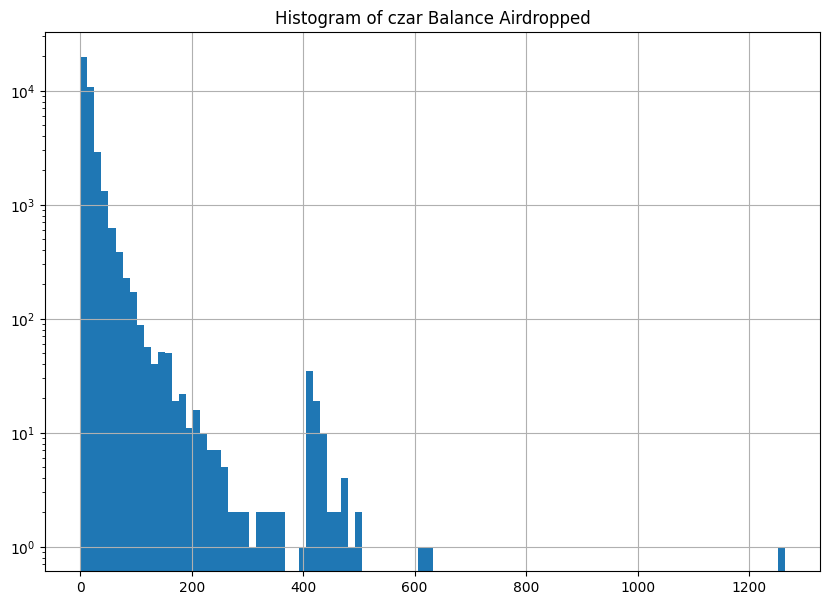

850000.0
Total Duplicates 0
                                       address      amount
0  juno1000xz25ydz8h9rwgnv30l9p0x500dvj0s9yyc9   6012371.0
1  juno1004k8qydtp743c40fve85vkxcwxa9lmz8aa287  14048843.0
2  juno1004mqvtqkckwzq0dkappks9ngf6ecc7zslpn5m  14048843.0
3  juno1004r3k452e0sskrssvc3fpnq72s56ssp3tkq9u  10130284.0
4  juno10077rlk3r3cx67j6jm7nl0sxcqpk23fqf7vxc6   7360761.0


In [124]:
frames = [
    foreDf[['Address', 'czarBalance']], 
    rektDf[['Address', 'czarBalance']],
    tradDf[['Address', 'czarBalance']], 
    racDf[['Address', 'czarBalance']], 
    netaDf[['Address', 'czarBalance']],
    junoDf[['Address', 'czarBalance']],
    lvnDf[['Address', 'czarBalance']]
    ]

totalDf = pd.concat(frames)
## finding duplicates and summing them
totalDf = totalDf.groupby('Address').sum().reset_index()
totalDf['czarBalance'] = totalDf['czarBalance'].apply(lambda x: int(x))

# Describe 
print((totalDf['czarBalance']/ PRECISION).describe())
# print histogram
fig = plt.figure(figsize =(10, 7))
(totalDf['czarBalance'] / PRECISION).hist(bins=100)
plt.title("Histogram of czar Balance Airdropped")
plt.yscale('log')
plt.show()


mintedDropped = totalDf['czarBalance'].sum()
totalDf.loc[len(totalDf.index)] = [DELIVERDAO_ADDR, TOTAL_SUPPLY - mintedDropped - TOTAL_SUPPLY * 0.15] 
# 15% Minted at the point of DAO Creation
# 5% to DeiliverDAO
# 10% to CzarDAO

totalMinted = totalDf['czarBalance'].sum()
print(totalMinted / PRECISION)

# Count duplicates
print('Total Duplicates', totalDf['Address'].value_counts().sum() - totalDf['Address'].value_counts().count())
# Export csv
totalDf.columns = ['address', 'amount']
print(totalDf.head())
totalDf.to_csv('czar_airdrop.csv', index=False)
# change header to address,amount to df
